# Specs preparation for 40yrs hindcast 

In [1]:
import os
#os.environ['PROJ_LIB'] = '/mnt/c/Users/maril/anaconda3/Library/share'
#os.environ['PROJ_LIB'] = '/home/ceco/anaconda3/share/proj'
import xarray as xr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.collections import PolyCollection
#from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import AxesGrid
import glob
from spec2d import *

In /home/marilia/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marilia/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marilia/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/marilia/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marilia/anaconda3/lib/python3.8/site-packages/m

In [2]:
filepath_coords =  '/mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/Mestrado/Dissert/malha_batimetria'
filepath_wv = '/mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/Mestrado/Dissert/datasets/csiro/csiro_corrigido/*'
output_path = '/mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/Mestrado/Dissert/specs/csiro_hindcast'

dataset_dirs = sorted(glob.glob(filepath_wv))
grid = 'grid_cartesiano_derefined_Marilia.xyz'

part0c = ['hs0C', 'tp0', 'th0', 'si0']
part1c = ['hs1C', 'tp1', 'th1', 'si1']
part2c = ['hs2C', 'tp2', 'th2', 'si2']
part3c = ['hs3C', 'tp3', 'th3', 'si3']

part0 = ['hs0', 'tp0', 'th0', 'si0']
part1 = ['hs1', 'tp1', 'th1', 'si1']
part2 = ['hs2', 'tp2', 'th2', 'si2']
part3 = ['hs3', 'tp3', 'th3', 'si3']

parameters = part0 + part1 + part2 + part3
parameters_c = part0c + part1c + part2c + part3c

csiro_keys = ['CgE0', 'CgE1', 'CgE2', 'CgE3', 'CgE4', 'CgE5', 'hs0C', 'hs0', 'hs1C',
              'hs1', 'hs2C', 'hs2', 'hs3C', 'hs3', 'hs4C', 'hs4', 'hs5C', 'hs5', 'th0',
              'th1', 'th2', 'th3', 'th4', 'th5', 'tp0', 'tp1', 'tp2', 'tp3', 'tp4', 'tp5',
              'si0', 'si1', 'si2', 'si3', 'si4', 'si5', 'longitude', 'latitude', 'hs_allC',
              'hs_all', 'th_all', 'si_all', 'te_all', 'CgE_all']

drop = [var for var in csiro_keys if var not in parameters]
drop_c = [var for var in csiro_keys if var not in parameters_c]

years = ['1981', '1982', '1983', '1984', '1985']
output_filename = 'csiro'

20


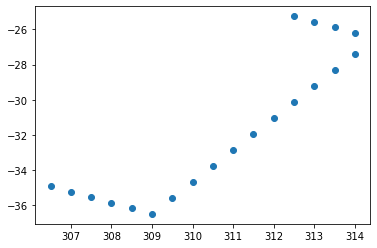

In [3]:
# Create coordinate vector

from coord_points import *

vert_NE = [-45.5, -26.5]
vert_NW = [-49.5, -24]
vert_SE = [-51, -36.5]
vert_SW = [-55, -34]

coords_north = coord_points(vert_NW, vert_NE, 0.5)
coords_east = coord_points(vert_SE, vert_NE, 0.5).tolist()
coords_east.sort(reverse=True)
coords_east = np.array(coords_east)
coords_south = coord_points(vert_SW, vert_SE, 0.5).tolist()
coords_south.sort(reverse=True)
coords_south = np.array(coords_south)


coords = np.vstack((coords_north, coords_east, coords_south))

coords = coords + [360, 0]

coords = coords[4:-3]

print(len(coords))

plt.scatter(coords[:, [0]], coords[:, [1]])

plt.show()

## Create wave spectra from wave parameters

In [4]:
from spec2d import *

for year in years:
    
    os.chdir(output_path)
    
    spec_part0 = spec_points_satellite(coords[:3], part0, year, dataset_dirs[:3], drop)
    spec_part1 = spec_points_satellite(coords[:3], part1, year, dataset_dirs[:3], drop)
    spec_part2 = spec_points_satellite(coords[:3], part2, year, dataset_dirs[:3], drop)
    spec_part3 = spec_points_satellite(coords[:3], part3, year, dataset_dirs[:3], drop)
    
    specs1 = (spec_part0 + spec_part1 + spec_part2 + spec_part3)
    
    spec_part0 = spec_points_satellite(coords[3:-2], part0c, year, dataset_dirs[3:-2], drop_c)
    spec_part1 = spec_points_satellite(coords[3:-2], part1c, year, dataset_dirs[3:-2], drop_c)
    spec_part2 = spec_points_satellite(coords[3:-2], part2c, year, dataset_dirs[3:-2], drop_c)
    spec_part3 = spec_points_satellite(coords[3:-2], part3c, year, dataset_dirs[3:-2], drop_c)
    
    specs2 = (spec_part0 + spec_part1 + spec_part2 + spec_part3)

    spec_part0 = spec_points_satellite(coords[-2:], part0, year, dataset_dirs[-2:], drop)
    spec_part1 = spec_points_satellite(coords[-2:], part1, year, dataset_dirs[-2:], drop)
    spec_part2 = spec_points_satellite(coords[-2:], part2, year, dataset_dirs[-2:], drop)
    spec_part3 = spec_points_satellite(coords[-2:], part3, year, dataset_dirs[-2:], drop)
        
    specs3 = (spec_part0 + spec_part1 + spec_part2 + spec_part3)
    
    specs = np.vstack((specs1, specs2, specs3))

    path = f'{output_path}/specs{year}'
    try:
        os.makedirs(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s" % path)

    os.chdir(path)

    np.save(f'specs_{year}.npy', specs)

    #specs = np.load(f'specs_{year}.npy')

    # Write specs to .bnd

    time = pd.date_range(start=f'{year}-01-01',
                         end=f'{year}-12-31T23:00:00',
                         freq='H')

    write_specs(time, coords, specs, output_filename)

(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
Successfully created the directory /mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/Mestrado/Dissert/specs/csiro_hindcast/specs1981
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
Successfully created the directory /mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/Mestrado/Dissert/specs/csiro_hindcast/specs1982
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(3, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(15, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
(2, 8760, 25, 36)
Successfully created the directory /mnt/c/Users/maril/OneDrive/Documentos/_UFRGS/M

PermissionError: [Errno 13] Permission denied: 'specs_csiro6.bnd'